#### Importando las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Data collection

In [2]:
df = pd.read_csv("house_prices.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Data Understanding

In [6]:
df.shape

#rows=1460, columns=81

(1460, 81)

In [4]:
df.columns
#the 81 rows

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### 3. Data Preparation

Seleccionamos una cantidad de datos

In [8]:
# Variable superficie total
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Máscara casas menores de 6000 sqft
df = df[df['TotalSF']<6000]

In [9]:
# Preparación datos
X = df[['TotalSF']]   # pandas DataFrame
y = df['SalePrice']   # pandas Series

### 4. Data Visulacization

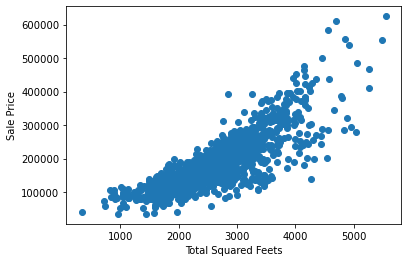

In [10]:
# Precio vivienda en función del número de sqft (squared feets)
plt.scatter(X, y)
plt.xlabel('Total Squared Feets')
plt.ylabel('Sale Price');

### Modelling

Training

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

1. Linear regression

In [19]:
#Load the library
from sklearn.linear_model import LinearRegression

In [20]:
#Create an instance of the model
reg = LinearRegression()

In [21]:
#Fit the regressor
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
#Do predictions
y_pred = reg.predict(X_test)

In [23]:
#Coeficientes
reg.coef_

array([82.80709211])

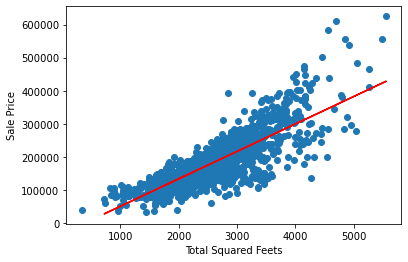

In [25]:
#Visualización de los datos
plt.scatter(X,y)
plt.plot(X_test,y_pred, 'r')
plt.xlabel('Total Squared Feets')
plt.ylabel('Sale Price');

2. KNN

In [26]:
# Cargamos la libreria
from sklearn.neighbors import KNeighborsRegressor


In [27]:
#Creamos la instancia
regk = KNeighborsRegressor(n_neighbors=5)

In [28]:
#Entrenar el modelo
regk.fit(X_train, y_train)

KNeighborsRegressor()

In [29]:
# Predicción
y_predk = regk.predict(X_test)

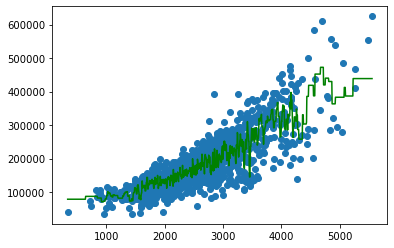

In [30]:
#Visualización de los datos
plt.scatter(X,y)
area_ficticias = np.linspace(X['TotalSF'].min(),X['TotalSF'].max(),1000)
plt.plot(area_ficticias,regk.predict(pd.DataFrame(area_ficticias)),'g')

In [ ]:
# Use against predictions
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs(y_test-y_pred)/y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

In [ ]:
# Use against predictions
mae = mean_absolute_error(y_test, y_predk)
mape = np.mean(np.abs(y_test-y_pred)/y_predk)
mse = mean_squared_error(y_test, y_predk)
rmse = np.sqrt(mean_squared_error(y_test, y_predk))
r2 = r2_score(y_test, y_predk)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")